In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import csv
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
dfTheseTeams = pd.read_csv('NFLTeams/NFL2018.csv')

dfOldTeams = pd.read_csv('NFLTeams/NFLAll.csv') #for cause of change in W/L look at NYPA,NYPF,NYYdsA,NYEXP stuff,NYoPtspG, NYSRS stuff, NYTotYds, NYRZPct, NYoRZPct,NYQbDYAR,NYAdjOLineYards,NYAdjDLineYards,NYOFFDVOA stuff,NYDEFDVOA stuff,NYSBWin
dfTheseTeams.head()

,Tm,G,PF,Yds,Ply,Y/P,TO,FL,1stD,Cmp,...,o3DConv,o3DPerc,o4DAtt,o4DConv,o4DPerc,oRZAtt,oRZTD,oRZPct,W,TeamAV
0,Arizona Cardinals,16,225,3865,902,4.3,28,10,239,283,...,78,0.380488,13,8,0.615385,53,33,0.622642,3,97.0
1,Atlanta Falcons,16,414,6226,1010,6.2,18,11,352,428,...,95,0.487179,13,10,0.769231,54,38,0.703704,7,140.0
2,Baltimore Ravens,16,389,5999,1135,5.3,20,11,367,334,...,72,0.341232,20,10,0.500000,41,26,0.634146,10,NaN
3,Buffalo Bills,16,269,4778,1008,4.7,32,9,283,271,...,74,0.364532,11,6,0.545455,48,34,0.708333,6,NaN
4,Carolina Panthers,16,376,5972,1011,5.9,22,6,356,378,...,73,0.398907,17,10,0.588235,47,33,0.702128,7,172.0


In [22]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=92)
shuffled_train = dfOldTeams.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75]]
shuffled_targets = dfOldTeams.iloc[:,[79]] #76 = diff
x,y = shuffle(shuffled_train,shuffled_targets)
test_length = int(round((len(shuffled_train))/5,0))
train_samples,train_targets = x.iloc[range(len(shuffled_train)-test_length),:],y.iloc[range(len(shuffled_train)-test_length),:]
test_samples, test_targets = x.iloc[range(len(shuffled_train)-test_length,len(shuffled_train))],y.iloc[range(len(shuffled_train)-test_length,len(shuffled_train))]
theseTeamsNames = dfTheseTeams.iloc[:,0]
final_test = dfTheseTeams.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75]]
train_targets,test_targets = np.ravel(train_targets),np.ravel(test_targets)
train_samples,train_targets,test_samples,test_targets,final_test = train_samples.astype('float64'),train_targets.astype('float64'), test_samples.astype('float64'), test_targets.astype('float64'), final_test.astype('float64')

In [4]:
poly = PolynomialFeatures(degree=2)
train_samples = poly.fit_transform(train_samples)
test_samples = poly.fit_transform(test_samples)
final_test = poly.fit_transform(final_test)

In [23]:
scaler = StandardScaler()
train_samples = scaler.fit_transform(train_samples)
test_samples = scaler.transform(test_samples)
final_test = scaler.transform(final_test)
print(train_samples)

[[ 0.          0.07790813 -0.36924571 ... -1.17686766 -0.83620579
   0.33314729]
 [ 0.         -0.08955795  0.34720119 ... -0.17186929  0.38073167
   0.65782474]
 [ 0.          1.34785922  0.57599659 ... -1.00936793  0.20869216
   1.63185708]
 ...
 [ 0.          0.03604161 -0.30578421 ...  0.3306299   0.42734487
   0.65782474]
 [ 0.         -0.71755574 -0.96377973 ...  2.34062664  1.14614159
  -1.93959483]
 [ 0.          1.58510283  1.38596569 ... -0.17186929 -0.63970163
   0.65782474]]


In [8]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(train_samples)
for i,j in zip(cluster.predict(final_test),theseTeamsNames):
    print(i,j)
win_arr = []
#win_arr.append(inner_list)
for i in range(3):
    win_arr.append([])
for i in range(len(train_targets)):
    win_arr[cluster.labels_[i]].append(train_targets[i])
#print(cluster.labels_,train_targets)

2 Arizona Cardinals
0 Atlanta Falcons
1 Baltimore Ravens
2 Buffalo Bills
0 Carolina Panthers
1 Chicago Bears
0 Cincinnati Bengals
0 Cleveland Browns
1 Dallas Cowboys
0 Denver Broncos
2 Detroit Lions
0 Green Bay Packers
0 Houston Texans
0 Indianapolis Colts
2 Jacksonville Jaguars
0 Kansas City Chiefs
0 Los Angeles Chargers
0 Los Angeles Rams
2 Miami Dolphins
1 Minnesota Vikings
0 New England Patriots
0 New Orleans Saints
0 New York Giants
2 New York Jets
2 Oakland Raiders
0 Philadelphia Eagles
0 Pittsburgh Steelers
2 San Francisco 49ers
0 Seattle Seahawks
0 Tampa Bay Buccaneers
1 Tennessee Titans
2 Washington Redskins


In [9]:
for cluster in win_arr:
    print(statistics.median(cluster))
    print(max(cluster))
    print(min(cluster))
    print('----')

8.0
15.0
2.0
----
9.0
15.0
2.0
----
7.0
13.0
0.0
----


In [10]:
for cluster in win_arr:
    print(sum(cluster)/len(cluster))

8.048780487804878
8.734939759036145
6.8936170212765955


In [8]:
print(max(test_targets))
print(min(test_targets))

13.0
2.0


In [9]:
print(max(train_targets))

15.0


In [10]:
print(min(train_targets))

0.0


In [11]:
train_samples,test_samples = abs(train_samples),abs(test_samples)

In [11]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM,Embedding, Conv1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping

C:\Users\Eric\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [30]:
encoder = LabelEncoder()
encoder.fit(train_targets)
encoded_Y = encoder.transform(train_targets)
dummy_y = np_utils.to_categorical(encoded_Y)

encoder.fit(test_targets)
encoded_test = encoder.transform(test_targets)
dummy_test = np_utils.to_categorical(encoded_test)


new_test = []
for row in dummy_test:
    row = np.array(row)
    row = np.insert(row,0,0)
    row = np.insert(row,1,0)
    row = np.insert(row,2,0)
    row = np.append(row,0)
    row = np.append(row,0)
    new_test.append(row)

new_test = np.array(new_test)

model = Sequential()
model.add(Embedding(75,10,input_length = 75))
#model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(Conv1D(filters=32, kernel_size=3, activation='softmax'))
model.add(MaxPooling1D(pool_size=5))
model.add(LSTM(150,activation='softmax'))
#model.add(Dropout(0.2))
model.add(Dense(16,activation='softmax'))
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy']) #categorical_crossentropy
print(model.summary())
es = EarlyStopping(monitor='val_loss',patience=35,restore_best_weights = True)
history = model.fit(train_samples,dummy_y,validation_data=(test_samples,dummy_test),epochs=100,batch_size=1,callbacks=[es])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 75, 10)            750       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 73, 32)            992       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 12, 32)            3104      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 2, 32)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 150)               109800    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2416      
Total para

ValueError: Error when checking target: expected dense_6 to have shape (16,) but got array with shape (11,)

In [26]:
encoder = LabelEncoder()
encoder.fit(train_targets)
encoded_Y = encoder.transform(train_targets)
dummy_y = np_utils.to_categorical(encoded_Y)

encoder.fit(test_targets)
encoded_test = encoder.transform(test_targets)
dummy_test = np_utils.to_categorical(encoded_test)

sgd = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)

new_test = []
for row in dummy_test:
    row = np.array(row)
    row = np.insert(row,0,0)
    row = np.insert(row,1,0)
    row = np.append(row,0)
    row = np.append(row,0)
    new_test.append(row)

new_test = np.array(new_test)
    
sgd = SGD(lr=0.07, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()
model.add(Dense(75, input_dim=75, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128, kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
#model.add(Dense(128, kernel_initializer='normal', activation='sigmoid',kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
model.add(Dense(75, kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss = "mean_squared_error", optimizer = 'adam', metrics=['mae']) #categorical_crossentropy
print(model.summary())
es = EarlyStopping(monitor='val_loss',patience=100,restore_best_weights = True)
history = model.fit(train_samples,train_targets,validation_data=(test_samples,test_targets),epochs=300,batch_size=1,callbacks=[es])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 75)                5700      
_________________________________________________________________
dense_19 (Dense)             (None, 75)                5700      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 76        
Total params: 11,476
Trainable params: 11,476
Non-trainable params: 0
_________________________________________________________________
None
Train on 230 samples, validate on 58 samples
Epoch 1/300
230/230 [==============================] - 1s 3ms/step - loss: 20.6517 - mean_absolute_error: 3.6171 - val_loss: 15.3121 - val_mean_absolute_error: 3.1349
Epoch 2/300
230/230 [==============================] - 0s 1ms/step - loss: 11.3339 - mean_absolute_error: 2.6570 - val_loss: 12.6241 - val_mean_absolute_error: 2.9373
Epoch 3/300
230/23

In [27]:
ynew = model.predict_proba(final_test)
for i,j in zip(ynew, theseTeamsNames):
    print(i[0], j)

9.031301 Arizona Cardinals
5.994567 Atlanta Falcons
12.443375 Baltimore Ravens
6.419445 Buffalo Bills
6.29475 Carolina Panthers
9.181847 Chicago Bears
7.3413544 Cincinnati Bengals
7.0533514 Cleveland Browns
7.967327 Dallas Cowboys
7.0050755 Denver Broncos
7.3214617 Detroit Lions
8.0708885 Green Bay Packers
7.3273897 Houston Texans
6.4001245 Indianapolis Colts
7.193469 Jacksonville Jaguars
14.072517 Kansas City Chiefs
11.435032 Los Angeles Chargers
10.167963 Los Angeles Rams
7.6182575 Miami Dolphins
10.796592 Minnesota Vikings
8.118767 New England Patriots
13.10613 New Orleans Saints
10.544403 New York Giants
3.929521 New York Jets
7.162777 Oakland Raiders
6.932886 Philadelphia Eagles
8.189131 Pittsburgh Steelers
12.3064165 San Francisco 49ers
13.362923 Seattle Seahawks
7.763093 Tampa Bay Buccaneers
8.472367 Tennessee Titans
8.663419 Washington Redskins


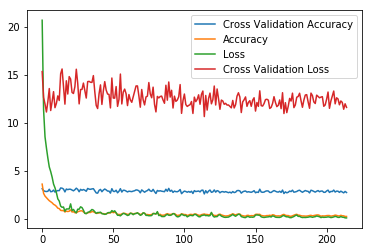

In [28]:
plt.plot(history.history['val_mean_absolute_error'], label="Cross Validation Accuracy")
plt.plot(history.history['mean_absolute_error'], label="Accuracy")
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Cross Validation Loss")
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (16,) and (1,)

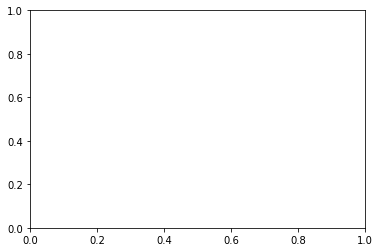

In [29]:
xarr = []
for i in range(16):
    xarr.append(i)
count = 0
for pred in ynew:
    plt.plot(xarr,pred)
    plt.title(theseTeamsNames[count])
    plt.show()
    count+=1

In [30]:
log_reg = linear_model.LinearRegression()
log_reg.fit(train_samples,train_targets)
predict = log_reg.predict(final_test)
for norm,name in zip(predict,theseTeamsNames):
    print(norm,name)
model_score = log_reg.score(test_samples,test_targets)
print("R2: %.4f" % log_reg.score(test_samples,test_targets))
mse_lin = mean_squared_error(test_targets, log_reg.predict(test_samples))
print("MSE: %.4f" % mse_lin)

5.436723468917615 Arizona Cardinals
8.584509104836485 Atlanta Falcons
11.383063022502819 Baltimore Ravens
3.654123127060429 Buffalo Bills
4.441997314231855 Carolina Panthers
9.17142744614402 Chicago Bears
6.144515603235405 Cincinnati Bengals
3.3015440021292086 Cleveland Browns
7.342782362137028 Dallas Cowboys
5.211917171116243 Denver Broncos
10.127506247292867 Detroit Lions
8.44779538116148 Green Bay Packers
7.273524469660121 Houston Texans
10.053983342833588 Indianapolis Colts
7.797523022563053 Jacksonville Jaguars
8.804306707107711 Kansas City Chiefs
8.787861094682262 Los Angeles Chargers
8.182109543306463 Los Angeles Rams
6.114111847347422 Miami Dolphins
10.036544057526644 Minnesota Vikings
6.6199215436550904 New England Patriots
10.594009548898583 New Orleans Saints
7.569643762861577 New York Giants
6.6351883588639184 New York Jets
6.045397355590923 Oakland Raiders
4.538120462454453 Philadelphia Eagles
10.529687670151807 Pittsburgh Steelers
8.603967094513056 San Francisco 49ers
7.0

In [15]:
model = linear_model.LogisticRegression(fit_intercept=True)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('model', model)])
parameters = {
    'pca__n_components' : [0.95, 0.99],
    'model__penalty' : ['l1','l2','elasticnet','none'],
    'model__C' : np.logspace(-1,1,5),
    'model__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__intercept_scaling' : [True,False],
}

search = GridSearchCV(pipe, parameters, iid=False, cv=3,error_score=np.nan)
search.fit(train_samples, train_targets)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.123):
{'model__C': 0.1, 'model__intercept_scaling': True, 'model__penalty': 'l1', 'model__solver': 'liblinear', 'pca__n_components': 0.95}


In [42]:
new_lin = linear_model.LogisticRegression(C=3.16,penalty='l1',solver='saga',fit_intercept=True,intercept_scaling=False)

pca = PCA(n_components=0.99).fit(train_samples)
new_train = pca.transform(train_samples)
new_target = pca.transform(final_test)
new_test = pca.transform(test_samples)
new_lin.fit(new_train,train_targets)
predict = new_lin.predict(new_target)
for norm, name in zip(predict,theseTeamsNames):
    print(norm,name)
predictions = new_lin.predict(new_test)
print("Score: %.4f" % r2_score(predictions,test_targets))

6.0 Arizona Cardinals
6.0 Atlanta Falcons
10.0 Baltimore Ravens
10.0 Buffalo Bills
10.0 Carolina Panthers
10.0 Chicago Bears
10.0 Cincinnati Bengals
5.0 Cleveland Browns
13.0 Dallas Cowboys
5.0 Denver Broncos
2.0 Detroit Lions
10.0 Green Bay Packers
9.0 Houston Texans
9.0 Indianapolis Colts
7.0 Jacksonville Jaguars
11.0 Kansas City Chiefs
10.0 Los Angeles Chargers
13.0 Los Angeles Rams
10.0 Miami Dolphins
2.0 Minnesota Vikings
7.0 New England Patriots
8.0 New Orleans Saints
7.0 New York Giants
7.0 New York Jets
6.0 Oakland Raiders
5.0 Philadelphia Eagles
10.0 Pittsburgh Steelers
9.0 San Francisco 49ers
2.0 Seattle Seahawks
9.0 Tampa Bay Buccaneers
10.0 Tennessee Titans
2.0 Washington Redskins
Score: -2.0625


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions,test_targets))

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 1 1 0 0 0 0 0 1]
 [0 0 0 0 0 1 1 1 0 1 2 0]
 [0 0 0 1 0 3 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 0 1 0 0 0 0 0 0]]


In [17]:
model = LinearSVC()
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('model', model)])
parameters = {
    'pca__n_components' : [50,60,65,70,75],
    'model__penalty' : ['l1','l2'],
    'model__loss' : ['hinge','squared_hinge'],
    'model__C' : np.logspace(-4,4,5),
    'model__fit_intercept' : [True,False],
    'model__intercept_scaling' : [True,False],
}

search = GridSearchCV(pipe, parameters, iid=False, cv=3,error_score=np.nan)
search.fit(train_samples, train_targets)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.159):
{'model__C': 0.01, 'model__fit_intercept': True, 'model__intercept_scaling': True, 'model__loss': 'hinge', 'model__penalty': 'l2', 'pca__n_components': 60}


In [90]:
new_svc = LinearSVC(C=0.001,penalty='l2',loss='hinge',fit_intercept=True,intercept_scaling=True)

pca = PCA(n_components=50).fit(train_samples)
new_train = pca.transform(train_samples)
new_target = pca.transform(final_test)
new_test = pca.transform(test_samples)
new_svc.fit(new_train,train_targets)

predict_svm = new_svc.decision_function(new_target)
for norm, name in zip(predict_svm,theseTeamsNames):
    print(norm,name)
predictions = new_svc.predict(new_test)
print("Score: %.4f" % accuracy_score(predictions,test_targets))

[-0.1223587  -0.20404784 -0.02521754  0.25227561  0.11764354  0.2729482
  0.75241582  0.02993795 -0.43695613 -0.51679489 -0.43095974 -0.39047938
 -0.93204885 -0.9913087  -0.47824157 -0.33960816] Arizona Cardinals
[-0.14811235 -0.20060229 -0.678268   -0.33162997 -0.14377275 -0.32012171
 -0.07361666  0.33249055 -0.68900262 -0.26903389 -0.39224224  0.01063782
 -0.09733774 -0.26561717 -0.17911809 -0.29149102] Atlanta Falcons
[-0.30338073 -0.29080402 -0.16378944 -0.57665048 -0.56506498 -0.54438262
 -0.75098817 -0.26948461  0.04547703  0.02182951  0.13203314 -0.37767539
  0.15226819  0.14562389 -0.12897016 -0.21372819] Baltimore Ravens
[-0.24522224 -0.2554715   0.09302587 -0.10381658 -0.14457378 -0.12007961
  0.09353724 -0.30700651  0.02088882 -0.16043009 -0.12653656 -0.46520387
 -0.58790503 -0.55061811 -0.37208407 -0.27265861] Buffalo Bills
[-0.21332549 -0.24969589 -0.3764749  -0.50266854 -0.23939372 -0.39591406
 -0.18715931  0.0146697  -0.30266094 -0.25992819 -0.17273433 -0.12624417
 -0.04

In [101]:
import statistics
print(np.std(predict_svm))
svm_norm = []
for i in predict_svm:
    svm_norm.append((i-(sum(predict_svm)/len(predict_svm)))/(np.std(predict_svm)*10))

0.23479392762288803


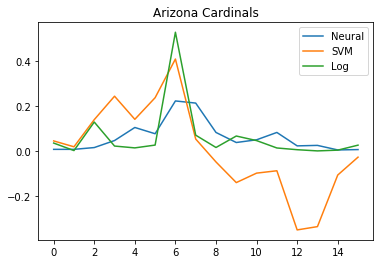

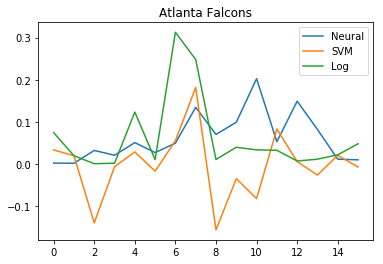

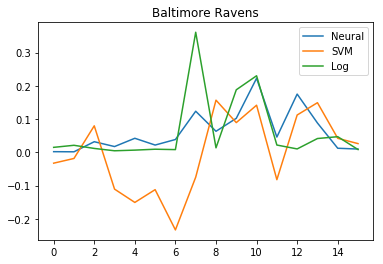

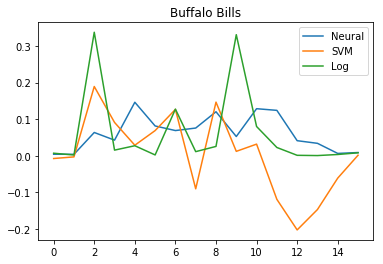

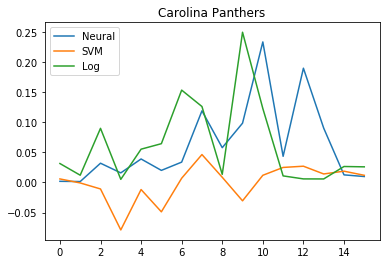

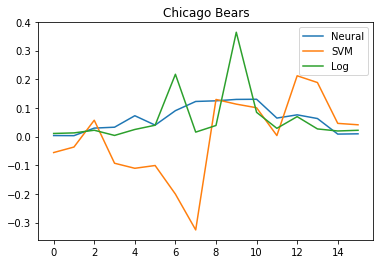

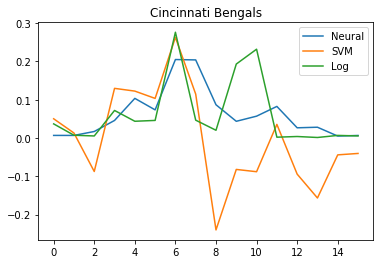

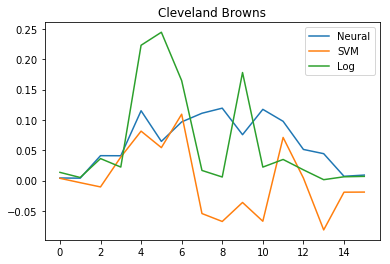

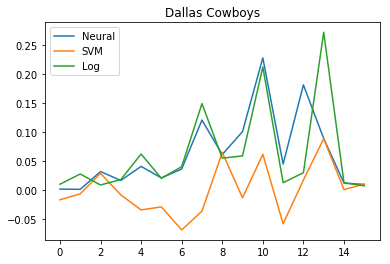

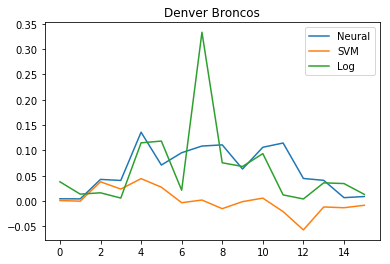

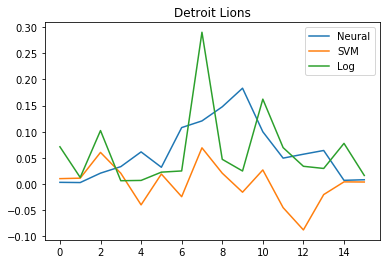

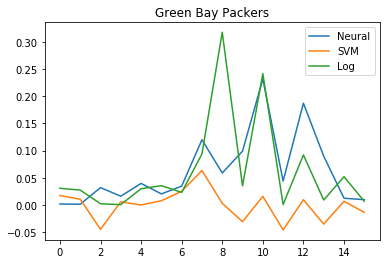

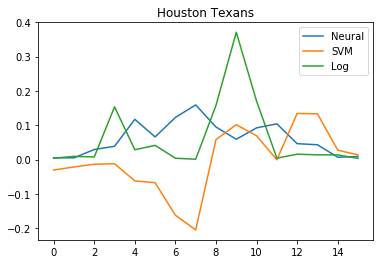

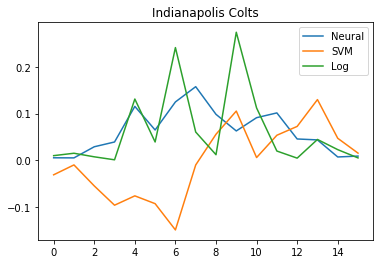

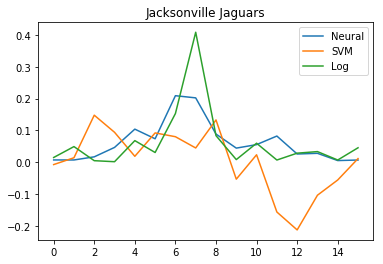

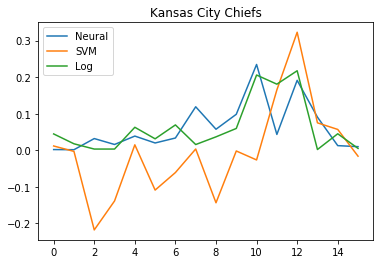

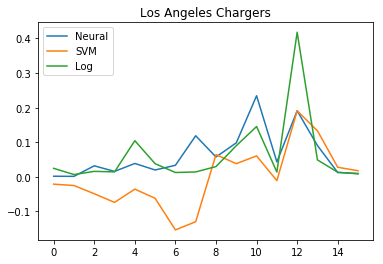

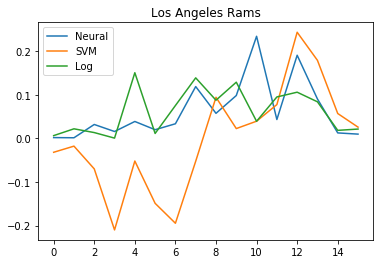

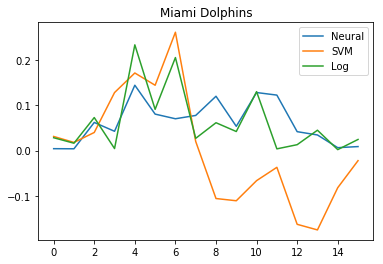

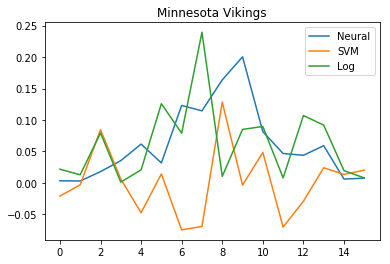

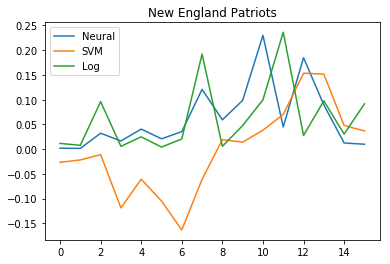

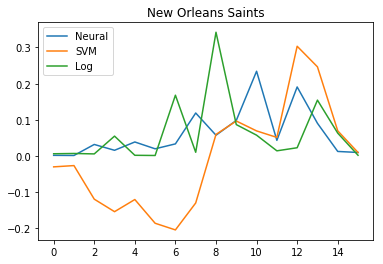

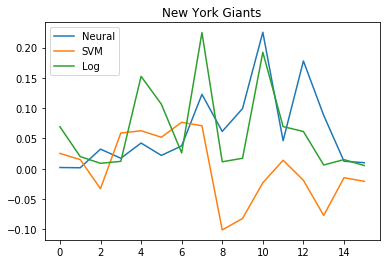

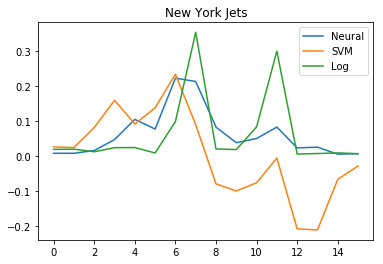

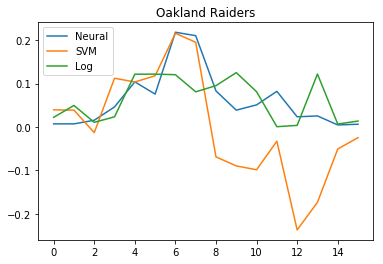

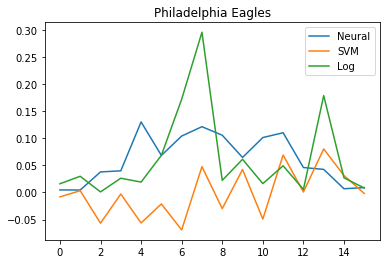

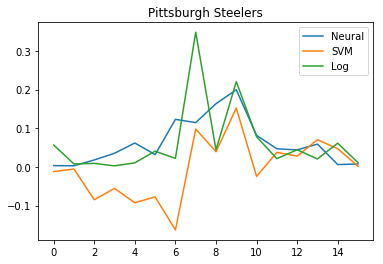

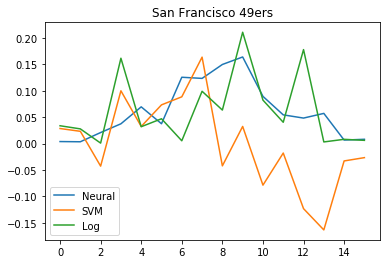

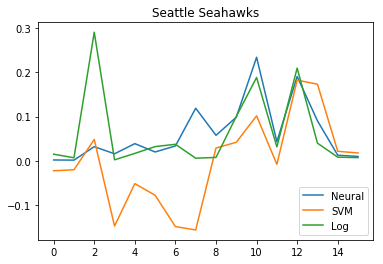

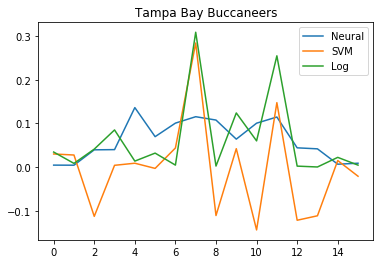

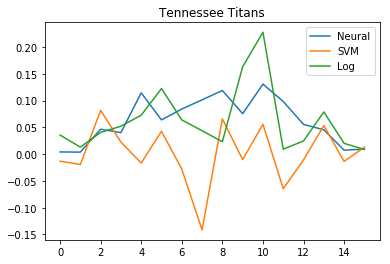

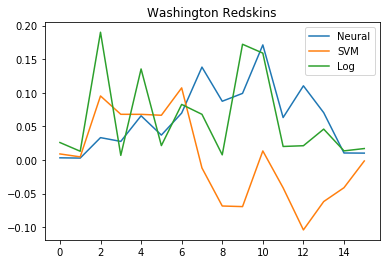

In [102]:
xarr = []
for i in range(16):
    xarr.append(i)
count = 0
for pred,pred_log,pred_svm in zip(ynew,predict,svm_norm):
    plt.plot(xarr,pred,label='Neural')
    plt.plot(xarr,pred_svm,label='SVM')
    plt.plot(xarr,pred_log,label='Log')
    plt.title(theseTeamsNames[count])
    plt.legend()
    plt.show()
    count+=1

In [39]:
linReg = linear_model.LinearRegression(fit_intercept = True)
linReg.fit(train_samples,train_targets)
linPred = []
normlinPred = []
y_predlinRB = linReg.predict(final_test)
y_LinReg = []
for norm, name in zip(y_predlinRB,theseTeamsNames):
    print(norm,name)
    y_LinReg.append(norm)
y_LinReg.sort()
model_range = (y_LinReg[len(y_LinReg)-1]-y_LinReg[0])
model_score = linReg.score(test_samples,test_targets)
print(f'Range: {model_range:.2f}')
print("R2: %.4f" % linReg.score(test_samples,test_targets))
mse_lin = mean_squared_error(test_targets, linReg.predict(test_samples))
print("MSE: %.4f" % mse_lin)
print(f"Model score {((model_range-mse_lin)*1/mse_lin)*model_score:0.2f}")

5.436723468917615 Arizona Cardinals
8.584509104836485 Atlanta Falcons
11.383063022502819 Baltimore Ravens
3.654123127060429 Buffalo Bills
4.441997314231855 Carolina Panthers
9.17142744614402 Chicago Bears
6.144515603235405 Cincinnati Bengals
3.3015440021292086 Cleveland Browns
7.342782362137028 Dallas Cowboys
5.211917171116243 Denver Broncos
10.127506247292867 Detroit Lions
8.44779538116148 Green Bay Packers
7.273524469660121 Houston Texans
10.053983342833588 Indianapolis Colts
7.797523022563053 Jacksonville Jaguars
8.804306707107711 Kansas City Chiefs
8.787861094682262 Los Angeles Chargers
8.182109543306463 Los Angeles Rams
6.114111847347422 Miami Dolphins
10.036544057526644 Minnesota Vikings
6.6199215436550904 New England Patriots
10.594009548898583 New Orleans Saints
7.569643762861577 New York Giants
6.6351883588639184 New York Jets
6.045397355590923 Oakland Raiders
4.538120462454453 Philadelphia Eagles
10.529687670151807 Pittsburgh Steelers
8.603967094513056 San Francisco 49ers
7.0

In [43]:
teams_arr = []
for i,j,k in zip(ynew, y_predlinRB, theseTeamsNames):
    print((i+j)/2, k)
    teams_arr.append((i+j)/2)

[7.2340117] Arizona Cardinals
[7.289538] Atlanta Falcons
[11.913219] Baltimore Ravens
[5.036784] Buffalo Bills
[5.368374] Carolina Panthers
[9.176638] Chicago Bears
[6.742935] Cincinnati Bengals
[5.177448] Cleveland Browns
[7.655055] Dallas Cowboys
[6.1084967] Denver Broncos
[8.7244835] Detroit Lions
[8.259342] Green Bay Packers
[7.300457] Houston Texans
[8.227055] Indianapolis Colts
[7.495496] Jacksonville Jaguars
[11.438412] Kansas City Chiefs
[10.111446] Los Angeles Chargers
[9.175036] Los Angeles Rams
[6.8661847] Miami Dolphins
[10.416568] Minnesota Vikings
[7.369344] New England Patriots
[11.850069] New Orleans Saints
[9.057024] New York Giants
[5.282355] New York Jets
[6.604087] Oakland Raiders
[5.735503] Philadelphia Eagles
[9.359409] Pittsburgh Steelers
[10.455192] San Francisco 49ers
[10.184881] Seattle Seahawks
[7.325327] Tampa Bay Buccaneers
[7.9394155] Tennessee Titans
[7.828486] Washington Redskins


In [45]:
with open('NFLTeams/TeamPreds.csv','a', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(teams_arr)

In [31]:
RidgeCV = linear_model.RidgeCV(alphas=[0.001, 10, 400],fit_intercept=True).fit(train_samples,train_targets)
RidgeCV.score(train_samples,train_targets)
predict = RidgeCV.predict(final_test)
pred_arr = []
for norm, name in zip(predict,theseTeamsNames):
    print(norm,name)
    pred_arr.append(norm)
pred_arr.sort()
model_range = (pred_arr[len(pred_arr)-1]-pred_arr[0])
model_score = RidgeCV.score(test_samples,test_targets)
print(f'Range: {model_range:.2f}')
print("R2: %.4f" % RidgeCV.score(test_samples,test_targets))
mse_ridge = mean_squared_error(test_targets, RidgeCV.predict(test_samples))
print("MSE: %.4f" % mse_ridge)
print(f"Model score {((model_range-mse_ridge)*1/mse_ridge)*model_score:0.2f}")

5.778708810709882 Arizona Cardinals
7.845986316128097 Atlanta Falcons
9.390498037247989 Baltimore Ravens
7.155882740783412 Buffalo Bills
8.052732807776557 Carolina Panthers
9.582780886940157 Chicago Bears
7.0308788083447045 Cincinnati Bengals
7.246247031328558 Cleveland Browns
8.871872664515584 Dallas Cowboys
7.860338178505259 Denver Broncos
8.254472564581945 Detroit Lions
8.16337953829415 Green Bay Packers
9.215916300700208 Houston Texans
8.92577677228899 Indianapolis Colts
7.327848173700715 Jacksonville Jaguars
9.292350399911873 Kansas City Chiefs
9.559987059186284 Los Angeles Chargers
9.408319468806265 Los Angeles Rams
6.554039162164899 Miami Dolphins
8.39957437788487 Minnesota Vikings
9.091468979874854 New England Patriots
10.378786137169293 New Orleans Saints
7.718269417915563 New York Giants
6.760613945727963 New York Jets
6.355939280638494 Oakland Raiders
8.34326357077557 Philadelphia Eagles
8.972811884213858 Pittsburgh Steelers
7.586076993414046 San Francisco 49ers
9.4426857735

In [86]:
from yellowbrick.regressor import AlphaSelection
from sklearn.exceptions import ConvergenceWarning
import warnings
alphas = np.logspace(-1, 3, 5)
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")
# Instantiate the linear model and visualizer
model = linear_model.LassoCV(cv = 3,max_iter=1000)

visualizer = AlphaSelection(model)

visualizer.fit(train_samples,train_targets)
g = visualizer.poof()
visualizer.score(test_samples,test_targets)

KeyboardInterrupt: 

In [32]:
Lasso_Opt = linear_model.Lasso(alpha=0.479)
Lasso_Opt.fit(train_samples,train_targets)
predict = Lasso_Opt.predict(final_test)
y_LinReg = []
for norm, name in zip(predict,theseTeamsNames):
    print(norm,name)
    y_LinReg.append(norm)
y_LinReg.sort()
model_range = (y_LinReg[len(y_LinReg)-1]-y_LinReg[0])
model_score = Lasso_Opt.score(test_samples,test_targets)
print(f'Range: {model_range:.2f}')
print("R2: %.4f" % visualizer.score(test_samples,test_targets))
mse_lasso = mean_squared_error(test_targets, visualizer.predict(test_samples))
print("MSE: %.4f" % mse_lasso)
print(f"Model score {((model_range-mse_lasso)*1/mse_lasso)*model_score:0.2f}")

6.655987010717223 Arizona Cardinals
8.304043227104074 Atlanta Falcons
8.73588208949931 Baltimore Ravens
7.384536489673365 Buffalo Bills
8.17804275113156 Carolina Panthers
8.886000391411583 Chicago Bears
7.758643580318283 Cincinnati Bengals
7.797904820770478 Cleveland Browns
8.266092965100086 Dallas Cowboys
7.91914019365371 Denver Broncos
7.988859151541798 Detroit Lions
8.122337080801115 Green Bay Packers
8.725418356922212 Houston Texans
8.716943296264523 Indianapolis Colts
7.439665618165527 Jacksonville Jaguars
9.224200487786263 Kansas City Chiefs
8.775689575751485 Los Angeles Chargers
9.170628812448673 Los Angeles Rams
7.409247987469679 Miami Dolphins
8.1290293349851 Minnesota Vikings
8.821515403449691 New England Patriots
9.326906501888773 New Orleans Saints
8.006434226605608 New York Giants
7.5881661837818255 New York Jets
7.245746632303574 Oakland Raiders
8.297165873404484 Philadelphia Eagles
8.533856331593698 Pittsburgh Steelers
7.831879611737533 San Francisco 49ers
8.660305751489

NameError: name 'visualizer' is not defined

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

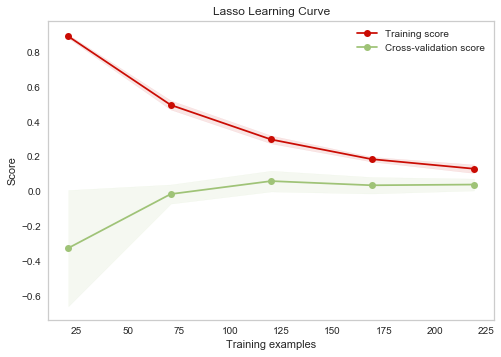

In [47]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")
plot_learning_curve(Lasso_Opt,"Lasso Learning Curve",train_samples,train_targets,cv=cv)

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

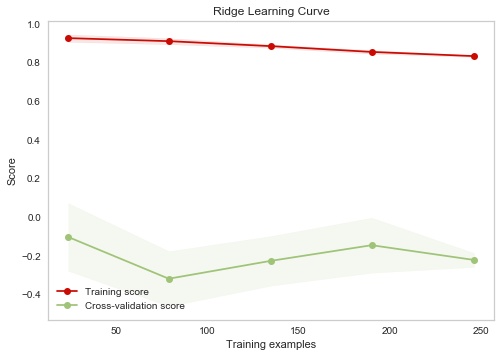

In [48]:
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
plot_learning_curve(RidgeCV,"Ridge Learning Curve",train_samples,train_targets,cv=cv)

In [33]:
huber_regress = linear_model.HuberRegressor()
huber_regress.fit(train_samples,train_targets)
predict = huber_regress.predict(final_test)
predict_arr = []
for norm, name in zip(predict,theseTeamsNames):
    print(norm,name)
    predict_arr.append(norm)
predict_arr.sort()
model_range = (predict_arr[len(predict_arr)-1]-predict_arr[0])
model_score = huber_regress.score(test_samples,test_targets)
print(f'Range: {model_range:.2f}')
print("R2: %.4f" % huber_regress.score(test_samples,test_targets))
mse_huber = mean_squared_error(test_targets, huber_regress.predict(test_samples))
print("MSE: %.4f" % mse_huber)
print(f"Model score {((model_range-mse_huber)*1/mse_huber)*model_score:0.2f}")

4.344568622864459 Arizona Cardinals
7.565236161976065 Atlanta Falcons
10.791789139622745 Baltimore Ravens
3.9316986469982362 Buffalo Bills
5.722341680325928 Carolina Panthers
8.61622158791482 Chicago Bears
7.85079920781684 Cincinnati Bengals
2.9380498984179537 Cleveland Browns
7.627454961120996 Dallas Cowboys
6.490956350226205 Denver Broncos
10.488025769631127 Detroit Lions
8.889683904605793 Green Bay Packers
8.557327195964255 Houston Texans
9.647361385910745 Indianapolis Colts
8.193774379648014 Jacksonville Jaguars
9.389553080159272 Kansas City Chiefs
9.627184483590657 Los Angeles Chargers
8.060962127143899 Los Angeles Rams
6.318757677361434 Miami Dolphins
9.578091035990816 Minnesota Vikings
7.68375047993919 New England Patriots
11.932604192778788 New Orleans Saints
9.055538471821736 New York Giants
6.553759774241513 New York Jets
5.846602417029761 Oakland Raiders
4.504250057297403 Philadelphia Eagles
10.345463858545893 Pittsburgh Steelers
8.986419442005337 San Francisco 49ers
9.10645

In [34]:
theil_regress = linear_model.TheilSenRegressor()
theil_regress.fit(train_samples,train_targets)
predict = theil_regress.predict(final_test)
predict_theil = []
for norm, name in zip(predict,theseTeamsNames):
    print(norm,name)
    predict_theil.append(norm)
predict_theil.sort()
model_range = (predict_theil[len(predict_theil)-1]-predict_theil[0])
model_score = theil_regress.score(test_samples,test_targets)
print(f'Range: {model_range:.2f}')
print("R2: %.4f" % theil_regress.score(test_samples,test_targets))
mse_theil = mean_squared_error(test_targets, theil_regress.predict(test_samples))
print("MSE: %.4f" % mse_theil)
print(f"Model score {((model_range-mse_theil)*1/mse_theil)*model_score:0.2f}")

5.2714957902279025 Arizona Cardinals
8.393768077910295 Atlanta Falcons
11.836675279658252 Baltimore Ravens
2.9468076215161307 Buffalo Bills
4.851145066167565 Carolina Panthers
8.417978803693622 Chicago Bears
6.829908942793056 Cincinnati Bengals
2.731359376172966 Cleveland Browns
7.62057635998428 Dallas Cowboys
5.5422202462321 Denver Broncos
10.500080117573704 Detroit Lions
8.751418165223196 Green Bay Packers
7.659035569867104 Houston Texans
9.416704500785661 Indianapolis Colts
8.324416861417209 Jacksonville Jaguars
7.905283742651462 Kansas City Chiefs
8.645200149647133 Los Angeles Chargers
7.644490868333246 Los Angeles Rams
6.945596330666226 Miami Dolphins
9.365733981118318 Minnesota Vikings
7.6417481919868795 New England Patriots
10.544109174013538 New Orleans Saints
8.104166370415527 New York Giants
6.506660359662076 New York Jets
7.295478902436722 Oakland Raiders
5.033341790781321 Philadelphia Eagles
9.637384833174625 Pittsburgh Steelers
8.658003869247406 San Francisco 49ers
7.04779

In [90]:
omp_regress = linear_model.OrthogonalMatchingPursuitCV()
omp_regress.fit(train_samples,train_targets)
predict = omp_regress.predict(final_test)
predict_omp = []
for norm, name in zip(predict,theseTeamsNames):
    print(norm,name)
    predict_omp.append(norm)
predict_omp.sort()
model_range = (predict_omp[len(predict_omp)-1]-predict_omp[0])
model_score = omp_regress.score(test_samples,test_targets)
print(f'Range: {model_range:.2f}')
print("R2: %.4f" % omp_regress.score(test_samples,test_targets))
mse_omp = mean_squared_error(test_targets, omp_regress.predict(test_samples))
print("MSE: %.4f" % mse_omp)
print(f"Model score {((model_range-mse_omp)*1/mse_omp)*model_score:0.2f}")

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictio

5.475127006359895 Arizona Cardinals
7.377679391180845 Atlanta Falcons
8.56151224173377 Baltimore Ravens
6.906509118410428 Buffalo Bills
7.773510647240334 Carolina Panthers
9.892443956722369 Chicago Bears
6.885366890638538 Cincinnati Bengals
6.486779208088979 Cleveland Browns
8.2599444916992 Dallas Cowboys
7.603055426168669 Denver Broncos
7.7133617534792 Detroit Lions
7.349513274145361 Green Bay Packers
9.191872912429359 Houston Texans
8.762919241334448 Indianapolis Colts
6.780723923920509 Jacksonville Jaguars
8.880933782766512 Kansas City Chiefs
9.297360997877494 Los Angeles Chargers
10.135262502512036 Los Angeles Rams
7.17877039172224 Miami Dolphins
7.979468078494058 Minnesota Vikings
9.504046606223715 New England Patriots
9.871239107910695 New Orleans Saints
6.658188728901697 New York Giants
6.550148323254923 New York Jets
6.811832346371338 Oakland Raiders
7.723562914311491 Philadelphia Eagles
8.32205630608152 Pittsburgh Steelers
7.060541277800511 San Francisco 49ers
9.08077993693689

<module 'matplotlib.pyplot' from 'C:\\Users\\Eric\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

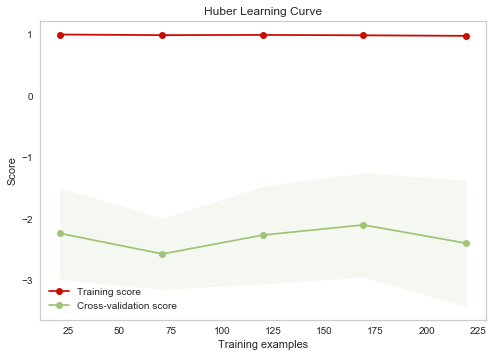

In [53]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(huber_regress,"Huber Learning Curve",train_samples,train_targets,cv=cv)

In [35]:
test_regress = linear_model.ElasticNetCV(cv=3,alphas=np.logspace(-1, 3, 400))
test_regress.fit(train_samples,train_targets)
predict = test_regress.predict(final_test)
predict_test = []
for norm, name in zip(predict,theseTeamsNames):
    print(norm,name)
    predict_test.append(norm)
predict_test.sort()
model_range = (predict_test[len(predict_test)-1]-predict_test[0])
model_score = test_regress.score(test_samples,test_targets)
print(f'Range: {model_range:.2f}')
print("R2: %.4f" % model_score)
mse_test = mean_squared_error(test_targets, test_regress.predict(test_samples))
print("MSE: %.4f" % mse_test)
print(f"Model score {((model_range-mse_test)*1/mse_test)*model_score:0.2f}")

6.094406311680709 Arizona Cardinals
8.281889703857814 Atlanta Falcons
9.070422768899807 Baltimore Ravens
7.257122292018661 Buffalo Bills
8.20096139207836 Carolina Panthers
9.250102701795099 Chicago Bears
7.565859143509404 Cincinnati Bengals
7.472553758505053 Cleveland Browns
8.484551226510424 Dallas Cowboys
7.919348685179188 Denver Broncos
8.140906397293541 Detroit Lions
8.141471645976413 Green Bay Packers
9.07870292565964 Houston Texans
8.831116522018418 Indianapolis Colts
7.325000134335795 Jacksonville Jaguars
9.249278034593411 Kansas City Chiefs
9.082290927866259 Los Angeles Chargers
9.230150155684443 Los Angeles Rams
7.156029700367107 Miami Dolphins
8.143658158335402 Minnesota Vikings
8.977960544758178 New England Patriots
9.770668230929088 New Orleans Saints
7.977435948358061 New York Giants
7.413630345865391 New York Jets
7.02713848173256 Oakland Raiders
8.406604941080001 Philadelphia Eagles
8.675428785090393 Pittsburgh Steelers
7.8554954366653424 San Francisco 49ers
8.9111620789

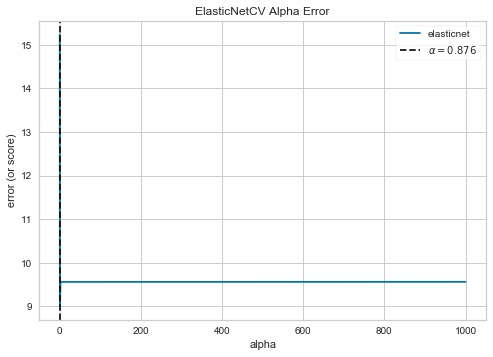

-0.3680848770397356

In [55]:
visualizer = AlphaSelection(test_regress)

visualizer.fit(train_samples,train_targets)
g = visualizer.poof()
visualizer.score(test_samples,test_targets)

In [8]:
from sklearn.svm import LinearSVC

In [14]:
svm = LinearSVC()
svm.fit(train_samples,train_targets)
predict = svm.predict(final_test)
predict_test = []
for norm, name in zip(predict,theseTeamsNames):
    print(norm,name)
    predict_test.append(norm)
predict_test.sort()
model_range = (predict_test[len(predict_test)-1]-predict_test[0])
model_score = svm.score(test_samples,test_targets)
print(f'Range: {model_range:.2f}')
print("R2: %.4f" % model_score)
mse_test = mean_squared_error(test_targets, svm.predict(test_samples))
print("MSE: %.4f" % mse_test)
print(f"Model score {((model_range-mse_test)*1/mse_test)*model_score:0.2f}")

6 Arizona Cardinals
6 Atlanta Falcons
10 Baltimore Ravens
2 Buffalo Bills
10 Carolina Panthers
9 Chicago Bears
3 Cincinnati Bengals
9 Cleveland Browns
6 Dallas Cowboys
7 Denver Broncos
2 Detroit Lions
8 Green Bay Packers
9 Houston Texans
6 Indianapolis Colts
7 Jacksonville Jaguars
11 Kansas City Chiefs
12 Los Angeles Chargers
4 Los Angeles Rams
8 Miami Dolphins
12 Minnesota Vikings
7 New England Patriots
6 New Orleans Saints
0 New York Giants
7 New York Jets
8 Oakland Raiders
6 Philadelphia Eagles
7 Pittsburgh Steelers
12 San Francisco 49ers
2 Seattle Seahawks
11 Tampa Bay Buccaneers
10 Tennessee Titans
9 Washington Redskins
Range: 12.00
R2: 0.0690
MSE: 17.0345
Model score -0.02


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
mse_arr = []
mse_arr.append(mse_lin)
mse_arr.append(mse_ridge)
mse_arr.append(mse_lasso)
mse_arr.append(mse_huber)
mse_arr.append(mse_theil)
mse_arr.append(mse_ransac)
mse_arr.append(mse_test)
mse_arr.sort()
print(mse_arr)
    

NameError: name 'mse_ransac' is not defined

In [41]:
from scipy.stats import skewnorm,norm
import seaborn as sns
import scipy.stats as stats
import math

In [42]:
for pred,name,pred1 in zip(y_LinReg,theseTeamsNames,pred_arr):
    mu = pred
    variance = mse**(1/2)
    sigma = math.sqrt(variance)
    x_axis = np.arange(0, 16, 0.001)
    plt.plot(x_axis, skewnorm.pdf(x_axis,(pred1-8),mu))
    plt.title(f"Mean outcome: {pred:.2f} wins, Predicted outcome: {pred1[0]:.2f} wins")
    plt.plot(x_axis, skewnorm.pdf(x_axis,(pred-8),pred1))
    plt.suptitle(name)
    plt.show()
    

NameError: name 'mse' is not defined

In [43]:
for i,j in zip(train_samples.index.values,huber_regress.outliers_):
    if j==True:
        print(dfOldTeams.iloc[i,0])
for i,j in zip(shuffled_train,RidgeCV.coef_[0]):
    print(i,j)

Arizona Cardinals
Seattle Seahawks 2017
Arizona Cardinals 2017
Atlanta Falcons 2013
Jacksonville Jaguars
New York Giants 2014
Jacksonville Jaguars 2012
Green Bay Packers 2017
Oakland Raiders
Cleveland Browns
Pittsburgh Steelers
Miami Dolphins 2012
Indianapolis Colts 2017
Baltimore Ravens
St. Louis Rams
Minnesota Vikings 2017
Houston Texans
Buffalo Bills 2014
Houston Texans 2017
Seattle Seahawks 2014
Cleveland Browns 2013
St. Louis Rams 2015
Buffalo Bills 2013
New England Patriots
Arizona Cardinals
New Orleans Saints 2012
Dallas Cowboys
Minnesota Vikings 2015
Baltimore Ravens 2014
Green Bay Packers
Jacksonville Jaguars 2013
San Francisco 49ers 2016
Atlanta Falcons
Los Angeles Chargers 2017
Green Bay Packers 2015
Los Angeles Rams
San Francisco 49ers
Washington Redskins
Denver Broncos
San Francisco 49ers 2017
Washington Redskins 2014
Tampa Bay Buccaneers 2013
Arizona Cardinals 2012
Baltimore Ravens 2015
Pittsburgh Steelers 2013
New York Giants 2016
New England Patriots 2014
Chicago Bears 

In [404]:
with open('NFLTeams/NFLPredictions.csv','a',newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(map(lambda x:[x],y_LinReg))